# File Download

In [66]:
import pandas as pd
import numpy as np

import datetime

In [67]:
today = pd.to_datetime(datetime.date.today())

year = today.year

ytd = pd.to_datetime(f'01-01-{year}')

t_minus_30 = today - datetime.timedelta(30)

t_minus_90 = today - datetime.timedelta(90)

In [68]:
tax_lot_df = pd.read_csv('/Users/DanCassin/Development/python/etrade_account_dashboard/data/TTM_tax_lots_090321.csv',
            usecols=[
                'Symbol', 'Quantity', 'Opening Date', 'Cost/Share $', 'Total Cost $',
                'Closing Date',	'Price/Share $', 'Proceeds $', 'Gain $'],
            skiprows=13,
            delimiter=',',
            skipfooter=2,
            engine='python'
)

In [69]:
tax_lot_df

,Symbol,Quantity,Opening Date,Cost/Share $,Total Cost $,Closing Date,Price/Share $,Proceeds $,Gain $
0,AAPL,35.00000,--,--,4684.72,--,--,5119.857505,435.13
1,Sell,20.00000,06/17/2021,130.09,2601.75,07/16/2021,146.28,2925.632860,323.88
2,Sell,15.00000,07/03/2021,138.86,2082.98,07/16/2021,146.28,2194.224645,111.25
3,ACB,500.00000,--,--,4899.92,--,--,4563.898280,-336.02
4,Sell,80.00000,10/20/2020,4.36,349.20,03/11/2021,10.35,828.068000,478.87
...,...,...,...,...,...,...,...,...,...
275,Sell,0.13158,09/25/2020,42.03,5.53,03/30/2021,51.51,6.777808,1.25
276,Sell,0.08087,12/25/2020,48.84,3.95,03/30/2021,51.51,4.165689,0.22
277,YOU,70.00000,--,--,3480.85,--,--,3272.471720,-208.38
278,Sell,20.00000,08/23/2021,49.42,988.35,08/30/2021,46.75,934.991920,-53.36


In [70]:
tax_lot_df.rename(columns = lambda x: x.lower().replace('$', '').strip().replace(' ','_'), inplace=True)
#tax_lot_df.drop(['deferred_loss', 'term','lot_selection', 'unnamed:_12'], axis=1, inplace=True)

In [71]:
tax_lot_df = tax_lot_df.replace('--', np.nan)
tax_lot_df['symbol']= tax_lot_df['symbol'].str.strip()
tax_lot_df['symbol'].replace('Sell', np.nan, inplace=True)
tax_lot_df['symbol'] = tax_lot_df['symbol'].ffill()

In [72]:
tax_lot_df.dropna(subset=['opening_date'], inplace=True)

In [73]:
tax_lot_df['opening_date'] = tax_lot_df['opening_date'].astype('Datetime64')
tax_lot_df['closing_date'] = tax_lot_df['closing_date'].astype('Datetime64')

In [74]:
tax_lot_df['pct_gain/loss'] = round((tax_lot_df['gain'] / tax_lot_df['total_cost']) * 100, 2)

In [75]:
tax_lot_df['category'] = pd.cut(tax_lot_df.gain, bins=[-5000, .0001, 5000],
    labels=['loss','gain'])

In [76]:
tax_lot_df.head()

,symbol,quantity,opening_date,cost/share,total_cost,closing_date,price/share,proceeds,gain,pct_gain/loss,category
1,AAPL,20.0,2021-06-17,130.09,2601.75,2021-07-16,146.28,2925.632860,323.88,12.45,gain
2,AAPL,15.0,2021-07-03,138.86,2082.98,2021-07-16,146.28,2194.224645,111.25,5.34,gain
4,ACB,80.0,2020-10-20,4.36,349.20,2021-03-11,10.35,828.068000,478.87,137.13,gain
5,ACB,95.0,2021-03-22,9.85,935.49,2021-04-30,8.89,845.009230,-90.48,-9.67,loss
6,ACB,100.0,2021-03-04,9.83,982.78,2021-04-30,8.89,889.483400,-93.30,-9.49,loss


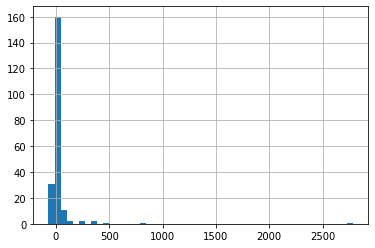

In [77]:
tax_lot_df['pct_gain/loss'].hist(bins=50);

In [78]:
tax_lot_df['pct_gain/loss'].mean()

24.901848341232228

In [79]:
tax_lot_df['pct_gain/loss'].median()

-1.85

In [80]:
tax_lot_df['days_held'] = (tax_lot_df['closing_date'] - tax_lot_df['opening_date']).dt.days

<AxesSubplot:>

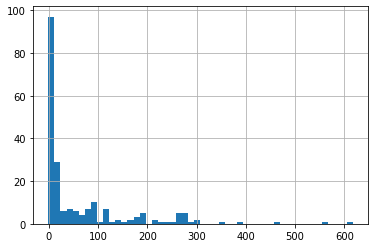

In [81]:
tax_lot_df['days_held'].hist(bins=50)

<AxesSubplot:xlabel='days_held', ylabel='pct_gain/loss'>

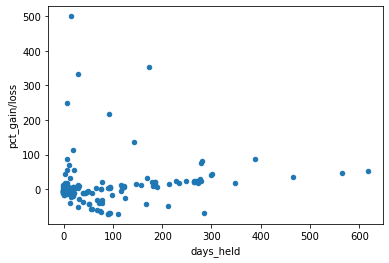

In [82]:
sub_df = tax_lot_df[['pct_gain/loss','days_held']]

sub_df = sub_df[sub_df['pct_gain/loss'] <=500]

sub_df.plot(kind='scatter', x='days_held', y='pct_gain/loss')

In [83]:
print(tax_lot_df['days_held'].mean())
print(tax_lot_df['days_held'].median())

65.13744075829383
14.0


In [84]:
tax_lot_df['days_held']

1       29
2       13
4      142
5       39
6       57
      ... 
274      4
275    186
276     95
278      7
279      6
Name: days_held, Length: 211, dtype: int64

In [85]:
last_90_days = tax_lot_df[tax_lot_df['opening_date'] > pd.to_datetime(t_minus_90)]

<AxesSubplot:>

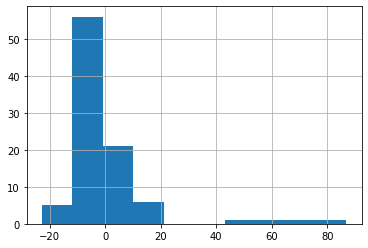

In [86]:
last_90_days['pct_gain/loss'].hist()

<AxesSubplot:>

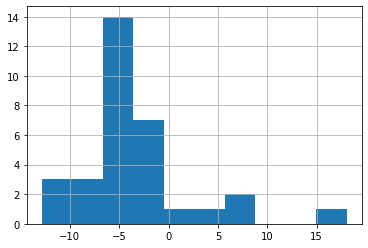

In [87]:
last_30_days = tax_lot_df[tax_lot_df['opening_date'] > pd.to_datetime(t_minus_30)]

last_30_days['pct_gain/loss'].hist()

In [88]:
last_30_losses = last_30_days[last_30_days['pct_gain/loss'] < 0]

round(last_30_losses['gain'].sum(),2)

-1666.67

In [89]:
last_30_gains = last_30_days[last_30_days['pct_gain/loss'] > 0]

last_30_gains['gain'].sum()

255.95999999999998

In [90]:
total_trades_90_days = int(last_90_days.shape[0])

pct_gain_trades_90 = (last_90_days[last_90_days['gain'] > 0].shape[0] / total_trades_90_days) * 100

total_trades_30_days = int(last_30_days.shape[0])

pct_gain_trades_30 = (last_30_days[last_30_days['gain'] > 0].shape[0] / total_trades_30_days) * 100

print(f'Profitable Trades Last 30 Days:\n{round(pct_gain_trades_30, 2)}%')

print(f'Profitable Trades Last 90 Days:\n{round(pct_gain_trades_90, 2)}%')

Profitable Trades Last 30 Days:
15.62%
Profitable Trades Last 90 Days:
30.43%


In [91]:
winning_trades = tax_lot_df[tax_lot_df['gain']> 0]
losing_trades = tax_lot_df[tax_lot_df['gain'] < 0]

total_winning_trades = winning_trades.shape[0]
total_losing_trades = losing_trades.shape[0]

avg_gain = round(winning_trades['gain'].mean(), 2)
avg_loss = abs(round(losing_trades['gain'].mean(), 2))

risk_reward = round((total_winning_trades * avg_gain) / (total_losing_trades * avg_loss), 2)

print(f'Reward/Risk {risk_reward}')

Reward/Risk 1.35


# A Few Intersting Visualizations   

In [92]:
tax_lot_df.head()

,symbol,quantity,opening_date,cost/share,total_cost,closing_date,price/share,proceeds,gain,pct_gain/loss,category,days_held
1,AAPL,20.0,2021-06-17,130.09,2601.75,2021-07-16,146.28,2925.632860,323.88,12.45,gain,29
2,AAPL,15.0,2021-07-03,138.86,2082.98,2021-07-16,146.28,2194.224645,111.25,5.34,gain,13
4,ACB,80.0,2020-10-20,4.36,349.20,2021-03-11,10.35,828.068000,478.87,137.13,gain,142
5,ACB,95.0,2021-03-22,9.85,935.49,2021-04-30,8.89,845.009230,-90.48,-9.67,loss,39
6,ACB,100.0,2021-03-04,9.83,982.78,2021-04-30,8.89,889.483400,-93.30,-9.49,loss,57


In [93]:
import plotly.express as px

less_than_100_pct = tax_lot_df[tax_lot_df['pct_gain/loss'] < 100]

fig = px.density_contour(less_than_100_pct, x="proceeds", y="pct_gain/loss")
fig.show()

In [94]:
less_than_100_pct[less_than_100_pct.category.isnull()]

,symbol,quantity,opening_date,cost/share,total_cost,closing_date,price/share,proceeds,gain,pct_gain/loss,category,days_held


In [99]:
fig = px.histogram(
        less_than_100_pct, x="pct_gain/loss",
        marginal='box', color='category',
        hover_data=less_than_100_pct.columns,
        nbins=200)

fig.show()

# Additions

- Comparison of last 30 days to last 90, YTD, TTM
- Cumulative count of winning trades losing trades over time
- x axis values - show max values of the data

In [97]:
less_than_100_pct[(less_than_100_pct['pct_gain/loss']<1) & (less_than_100_pct['category'] == 'gain')]

,symbol,quantity,opening_date,cost/share,total_cost,closing_date,price/share,proceeds,gain,pct_gain/loss,category,days_held
83,CCRN,228.0,2021-06-11,17.51,3992.28,2021-06-22,17.53,3996.780036,4.50,0.11,gain,11
95,DIA,20.0,2021-06-05,347.55,6950.98,2021-06-07,348.39,6967.760000,16.78,0.24,gain,2
169,LCUT,250.0,2021-05-17,16.50,4125.00,2021-05-19,16.58,4144.415250,19.42,0.47,gain,2
183,MYRG,10.0,2021-07-03,90.41,904.10,2021-07-16,90.49,904.912000,0.81,0.09,gain,13
184,MYRG,15.0,2021-07-09,89.96,1349.40,2021-07-16,90.49,1357.368000,7.97,0.59,gain,7
198,OCGN,125.0,2021-06-25,8.25,1031.25,2021-06-30,8.30,1037.475000,6.22,0.60,gain,5
226,SHOP,1.0,2021-07-08,1572.00,1572.00,2021-07-07,1585.59,1585.590000,13.59,0.86,gain,-1


In [100]:
tax_lot_df

,symbol,quantity,opening_date,cost/share,total_cost,closing_date,price/share,proceeds,gain,pct_gain/loss,category,days_held
1,AAPL,20.00000,2021-06-17,130.09,2601.75,2021-07-16,146.28,2925.632860,323.88,12.45,gain,29
2,AAPL,15.00000,2021-07-03,138.86,2082.98,2021-07-16,146.28,2194.224645,111.25,5.34,gain,13
4,ACB,80.00000,2020-10-20,4.36,349.20,2021-03-11,10.35,828.068000,478.87,137.13,gain,142
5,ACB,95.00000,2021-03-22,9.85,935.49,2021-04-30,8.89,845.009230,-90.48,-9.67,loss,39
6,ACB,100.00000,2021-03-04,9.83,982.78,2021-04-30,8.89,889.483400,-93.30,-9.49,loss,57
...,...,...,...,...,...,...,...,...,...,...,...,...
274,VWO,0.01778,2021-03-26,50.63,0.90,2021-03-30,51.51,0.915865,0.00,0.00,loss,4
275,VWO,0.13158,2020-09-25,42.03,5.53,2021-03-30,51.51,6.777808,1.25,22.60,gain,186
276,VWO,0.08087,2020-12-25,48.84,3.95,2021-03-30,51.51,4.165689,0.22,5.57,gain,95
278,YOU,20.00000,2021-08-23,49.42,988.35,2021-08-30,46.75,934.991920,-53.36,-5.40,loss,7
